## Title

Generative Adversarial Networks
- Generate 1D Gaussian Distribution from Uniform Noise 

## Description

In this exercise, we are going to generate 1-D Gaussian distribution from a n-D uniform distribution. This is a toy exercise in order to understand the ability of GANs (generators) to generate arbitrary distributions from random noise.


## Hints

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#train_on_batch" target="_blank">tf.keras.Model.train_on_batch()</a> tf.keras.Model.train_on_batch()

Runs a single gradient update on a single batch of data.

<a href="https://numpy.org/doc/stable/reference/generated/numpy.ones.html" target="_blank">np.ones</a> np.ones

<a href="https://numpy.org/doc/stable/reference/generated/numpy.zeros.html" target="_blank">np.zeros</a> np.zeros

##  🎨 Generative Models 🖼

Generate 1-D Gaussian distribution from a n-D uniform distribution
  
  <hr>
In this exercise, we are going to generate 1-D Gaussian distribution from a n-D uniform distribution.  This is a toy exercise in order to understand the ability of GANs (generators) to generate arbitrary distributions from random noise.

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.stats import norm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import plot_model
%matplotlib inline

tf.random.set_seed(109)
np.random.seed(109)

In [11]:
#This is our real dataset (samples from stanard normal distribution )
def generate_data(n_samples = 10000,n_dim=1):
    np.random.seed(109)
    return np.random.randn(n_samples, n_dim) 
    

In [12]:
# A general function to define feedforward architecture.
def make_model(input_dim, 
               output_dim, 
               hidden_dim=64,
               n_layers = 1,
               activation='tanh',
               optimizer='adam',
               loss = 'binary_crossentropy'):
    
    model = Sequential()
    model.add(Dense(hidden_dim,input_dim=input_dim,activation=activation))
    
    for _ in range(n_layers-1):
        model.add(Dense(hidden_dim),activation=activation)
    model.add(Dense(output_dim))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [13]:
# hyper-parameters
NOISE_DIM = 100
DATA_DIM = 1   #this is equivalent to image size e.g. 32*32*3
G_LAYERS = 1
D_LAYERS = 1
generator = make_model(NOISE_DIM, DATA_DIM, n_layers=G_LAYERS)  
discriminator = make_model(DATA_DIM, 1, n_layers= D_LAYERS, activation='sigmoid')  
 

In [16]:
def get_gan_network(random_dim, optimizer = 'adam'):
    
    #This ensures that when we combine our networks we only train the Generator.
    #While generator training we do not want discriminator weights to be adjusted. 
    discriminator.trainable = False
    
    gan_input = Input(shape=(random_dim,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    #this model will be used to train generator
    gan = tf.keras.Model(inputs = gan_input,outputs=gan_output)
    gan.compile( loss='binary_crossentropy', optimizer=optimizer)
    return gan

In [17]:
def train_gan(epochs=15,batch_size=128):
    #Loads the real data 
    x_train = generate_data(n_samples=12800,n_dim=DATA_DIM)  
    gan = get_gan_network(NOISE_DIM, 'adam') # Get GAN model 

    for e in range(1,epochs+1):   
        np.random.seed(109 + e)
        # noise from a uniform distribution 
        noise = np.random.rand(batch_size,NOISE_DIM) 
        # generate a batch of fake data/images)
        generated_values = generator.predict(noise)
        
        #Gets a batch of real data (images)
        true_batch = x_train[np.random.choice(x_train.shape[0], batch_size, replace=False), :]  

        # Train discriminator on real data, use train_on_batch
        # real data has label of all 1s
        disc_history_true =  ___ 
        # Train discriminator on generated values, use train_on_batch
        # fake data has label of all 0s
        disc_history_noise = ___

        # Train generator/GAN
        noise = np.random.rand(batch_size,NOISE_DIM)
        y_gen = np.ones(batch_size)      
        # Train gan with noise, with label all 1s. 
        gan_loss = ___

        
    return generator, discriminator, gan_loss, disc_history_true, disc_history_noise
generator, discriminator, gan_loss, disc_history_true, disc_history_noise = train_gan()

In [0]:
### edTest(test_check) ###
print( gan_loss, disc_history_true, disc_history_noise)


1st order moment -  True :  0.0 , GAN : [0.]
2nd order moment -  True :  1.0016611800894593 , GAN : [0.11815298]
3rd order moment -  True :  0.003238467835095741 , GAN : [-0.00209988]
4th order moment -  True :  3.0480390897072773 , GAN : [0.04024393]


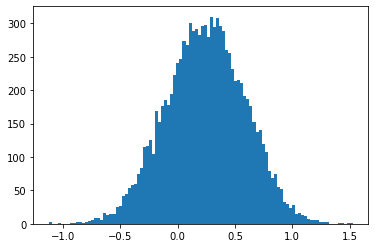

In [18]:
noise = np.random.rand(10000,NOISE_DIM)
generated_values = generator.predict(noise)
plt.hist(generated_values,bins=100)

true_gaussian = [np.random.randn() for x in range(10000)]

print('1st order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 1) , ', GAN :', scipy.stats.moment(generated_values,1))
print('2nd order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 2) , ', GAN :', scipy.stats.moment(generated_values,2))
print('3rd order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 3) , ', GAN :', scipy.stats.moment(generated_values,3))
print('4th order moment - ', 'True : ', scipy.stats.moment(true_gaussian, 4) , ', GAN :', scipy.stats.moment(generated_values,4))
plt.show()

<div class="alert alert-block alert-info">
    <h3>CONCLUSIONS </h3>     <br/>

1. GANs are able to learn a generative model from general noise distributions. <br/>

2. Traditional GANs do not learn the higher-order moments well. Possible issues : Number of samples, approximating higher moments is hard. Usually known to under-predict higher order variances. For people interested in learning why, read more about divergence measures between distributions (particularly about Wasserstein etc.)
    </div>
    

#### References

- GANs in Action (Jakub Langr; Vladimir Bok) 
- https://machinelearningmastery.com/generative-adversarial-network-loss-functions/ 
- https://arxiv.org/pdf/1406.2661.pdf